# Image Classification Using CNN
By : Mohamed Mamdouh Elaghory

________

we'll build a CNN using Keras to use it classifying thousands of pictures in six different categories

Data link : https://www.kaggle.com/puneet6060/intel-image-classification

first to import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb                  # is a library to [open folders]
import cv2                         # is a library to [resize image]
import tensorflow as tf
import keras

In [ ]:
# Install the Kaggle library
! pip install kaggle

In [ ]:
from google.colab import files
files.upload()                     # upload [kaggle.json] which path is ( C:\Users\nooor\Downloads )

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nourmamdouh","key":"0ec2f09161ea397dd9d89b5afefe58aa"}'}

In [ ]:
# Make a folder named “.kaggle”
! mkdir ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file.
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d puneet6060/intel-image-classification

 98% 340M/346M [00:07<00:00, 48.4MB/s]
100% 346M/346M [00:07<00:00, 49.4MB/s]


In [ ]:
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
trainpath = 'seg_train/'
testpath = 'seg_test/'
predpath = 'seg_pred/'

# Open Folders

now let's first check the Train folder to have a look to its content

In [ ]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2404 in folder glacier
For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2274 in folder sea
For training data , found 2512 in folder mountain
For training data , found 2382 in folder street


ok , how about the test folder

In [ ]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 553 in folder glacier
For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 510 in folder sea
For testing data , found 525 in folder mountain
For testing data , found 501 in folder street


_____
now for prediction folder

In [ ]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


_____

# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [ ]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

### to display the images sizes in ` train folder`

In [ ]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()                # almost all of images are [150,150,3]

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

_____
### to display the images sizes in ` test folder`

In [ ]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()               # almost all of images are [150,150,3]

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

_____
### to display the images sizes in ` predict folder`

In [ ]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()                   # almost all of images are [150,150,3]

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

- now it's time to read all images & convert it into arrays

- first we'll create a variable [s] , which refer to size , so we can change it easily. 

- let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

### 1. Read Image from [ train folder ]

In [ ]:
s = 100

now to read all pictues in six categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function 

In [ ]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))      # will resize image to 100*100 dimension & return the array per image.
        X_train.append(list(image_array))
        y_train.append(code[folder])

great , now how many items in X_train 

In [ ]:
print(f'X_train is:  {len(X_train)} images')
print(f'y_train is:  {len(y_train)} label for each image')

X_train is:  14034 images
y_train is:  14034 label for each image


also we have have a look to random pictures in X_train , and to adjust their title using the y value

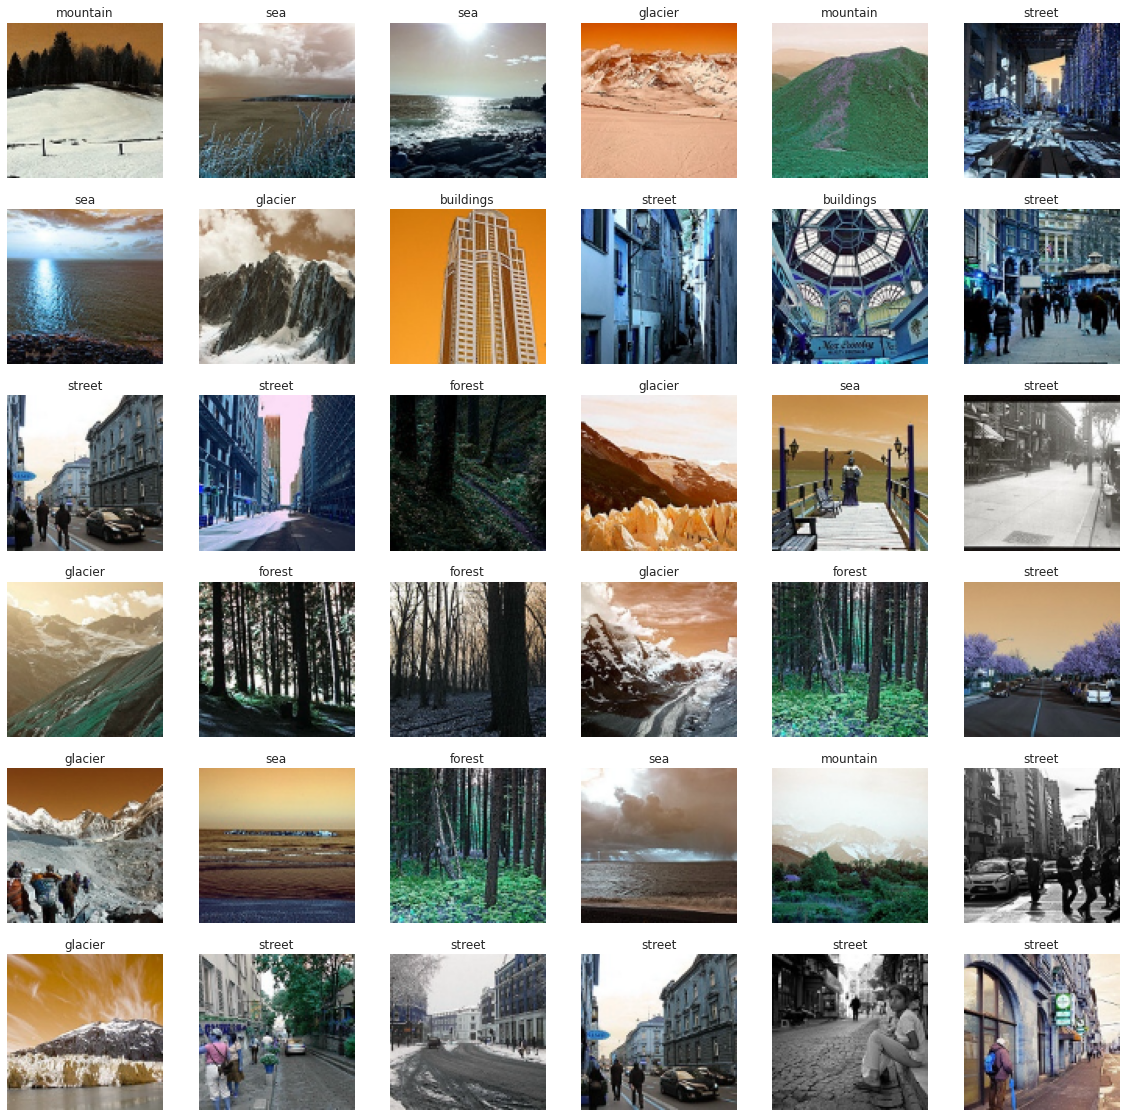

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :       # print any 36 images from X_train images.
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

____
### 2. Read Image from [ test folder ]

In [ ]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))       # will resize image to 100*100 dimension & return the array per image.
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [ ]:
print(f'X_test is:  {len(X_test)} images')
print(f'y_test is:  {len(y_test)} label for each image')

X_test is:  3000 images
y_test is:  3000 label for each image


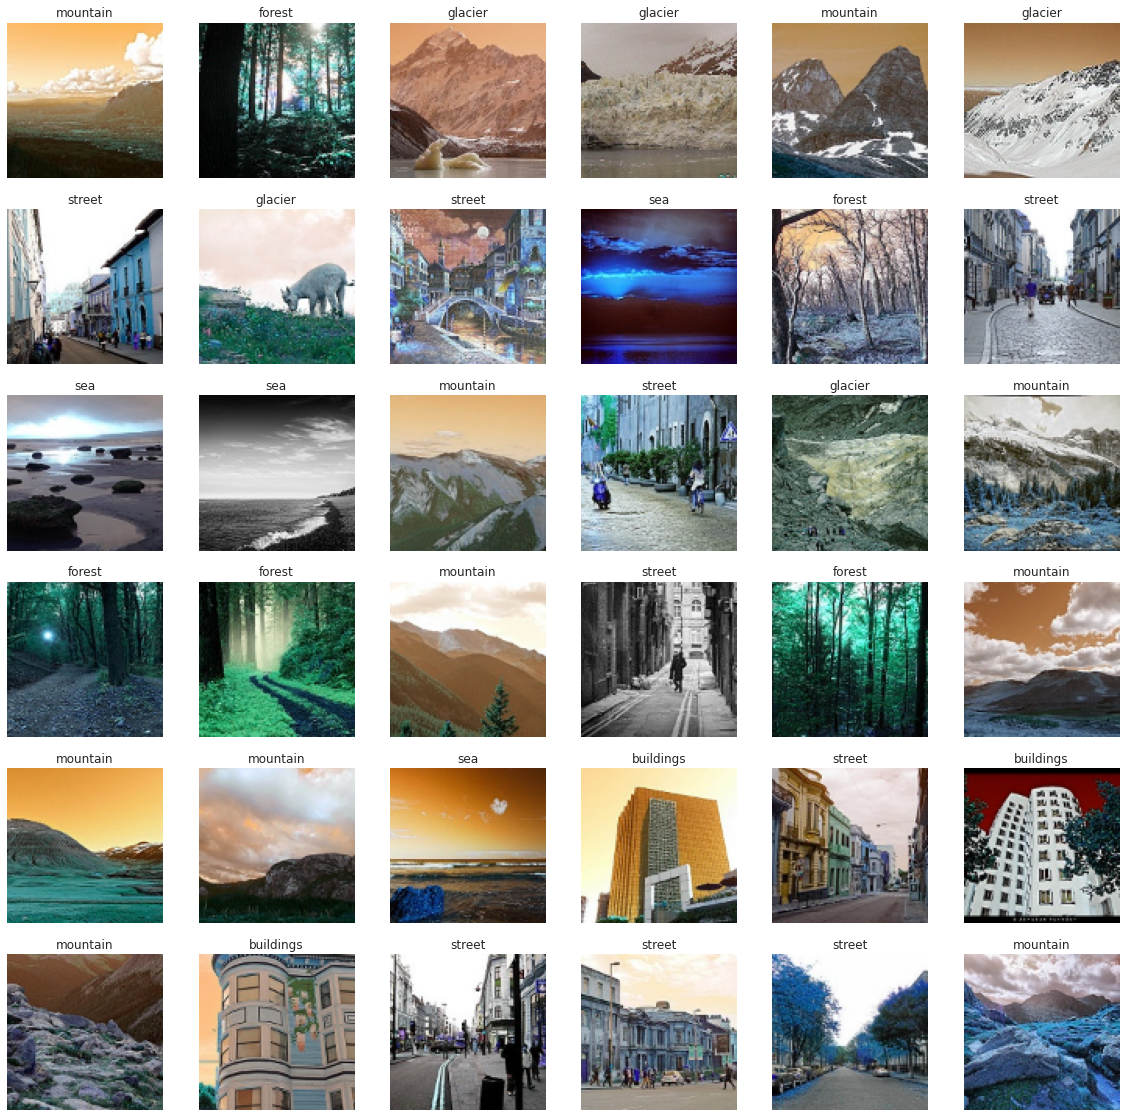

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) :         # print any 36 images from X_test images.
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

____
### 3. Read Image from [ predict folder ] , without having label ofcourse

In [ ]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))         # will resize image to 100*100 dimension & return the array per image.
    X_pred.append(list(image_array))       

In [ ]:
print(f'X_pred is:  {len(X_pred)} images')

X_pred is:  7301 images


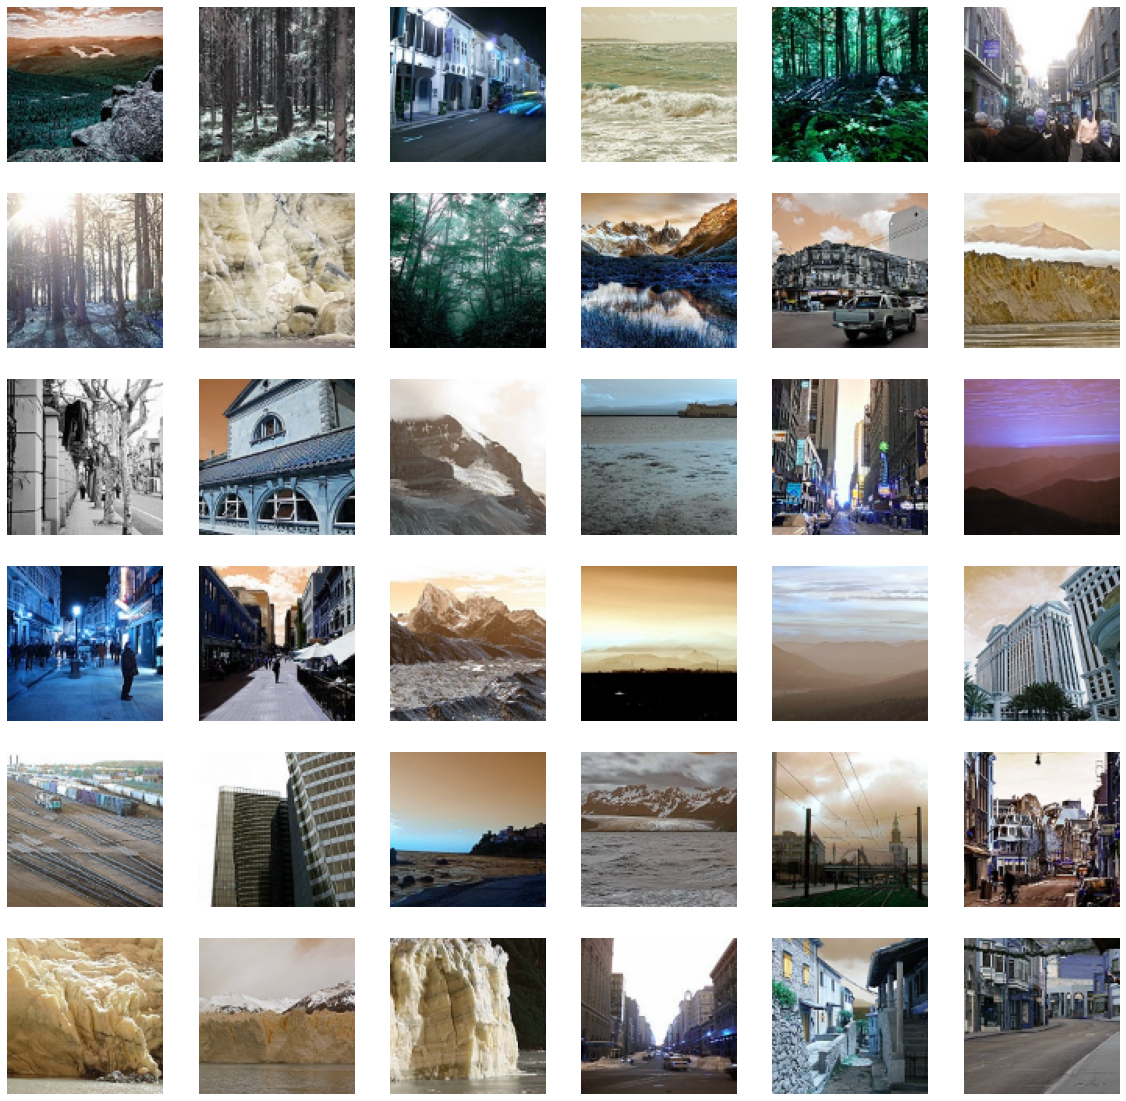

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) :       # print any 36 images from X_pred images.
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

________

# Building The Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [ ]:
# # must convert [x_train] & [y_train] & [X_test] & [y_test] & [X_pred_array] to numpy array before train model.
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_pred_array = np.array(X_pred)


print(f' X_train shape is:  {X_train.shape} ')
print(f' y_train shape is:  {y_train.shape} ')
print(f' X_test  shape is:  {X_test.shape} ')
print(f' y_test  shape is:  {y_test.shape} ')
print(f' X_pred  shape is:  {X_pred_array.shape} ')

 X_train shape is:  (14034, 100, 100, 3) 
 y_train shape is:  (14034,) 
 X_test  shape is:  (3000, 100, 100, 3) 
 y_test  shape is:  (3000,) 
 X_pred  shape is:  (7301, 100, 100, 3) 


### now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(s,s,3)),
        # keras.layers.BatchNormalization(),
        # keras.layers.Conv2D(120, kernel_size=(3,3), activation='relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(4,4),
    
        keras.layers.Conv2D(120, kernel_size=(3,3), activation='relu'),

        keras.layers.Conv2D(80, kernel_size=(3,3), activation='relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Conv2D(50, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPool2D(4,4),
    
        keras.layers.Flatten() ,    
        keras.layers.Dense(120, activation='relu') ,    
        keras.layers.Dense(100, activation='relu') ,    
        keras.layers.Dense(50, activation='relu') ,        
        keras.layers.Dropout(rate= 0.5) ,            
        keras.layers.Dense(6, activation='softmax')   
        ])

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ? 

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 96, 96, 100)       180100    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 100)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 120)       108120    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (Non

now to train the model , lets use 50 epochs now

In [ ]:
ThisModel = KerasModel.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
439/439 [==============================] - 77s 168ms/step - loss: 1.3871 - accuracy: 0.4408
Epoch 2/50
439/439 [==============================] - 72s 165ms/step - loss: 1.0813 - accuracy: 0.5650
Epoch 3/50
439/439 [==============================] - 72s 164ms/step - loss: 0.9961 - accuracy: 0.6086
Epoch 4/50
439/439 [==============================] - 72s 164ms/step - loss: 0.8846 - accuracy: 0.6556
Epoch 5/50
439/439 [==============================] - 72s 164ms/step - loss: 0.8397 - accuracy: 0.6890
Epoch 6/50
439/439 [==============================] - 72s 165ms/step - loss: 0.7704 - accuracy: 0.7200
Epoch 7/50
439/439 [==============================] - 72s 164ms/step - loss: 0.7209 - accuracy: 0.7445
Epoch 8/50
439/439 [==============================] - 72s 164ms/step - loss: 0.6681 - accuracy: 0.7676
Epoch 9/50
439/439 [==============================] - 72s 164ms/step - loss: 0.6262 - accuracy: 0.7866
Epoch 10/50
439/439 [==============================] - 72s 164ms/step - l

how is the final loss & accuracy


In [ ]:
Loss, Accuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is: ', Loss)
print('Test Accuracy is: ', Accuracy)

94/94 [==============================] - 6s 62ms/step - loss: 1.7393 - accuracy: 0.7607
Test Loss is:  1.7392635345458984
Test Accuracy is:  0.7606666684150696


ok , only 76% accuracy & can be increased by tuning the hyperparameters



_______

now to predict X test

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is: ', y_pred.shape)

Prediction Shape is:  (3000, 6)


great

now it's time to redict X Predict

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is: ', y_result.shape)

Prediction Shape is:  (7301, 6)


and to show random redicted pictures & its predicting category


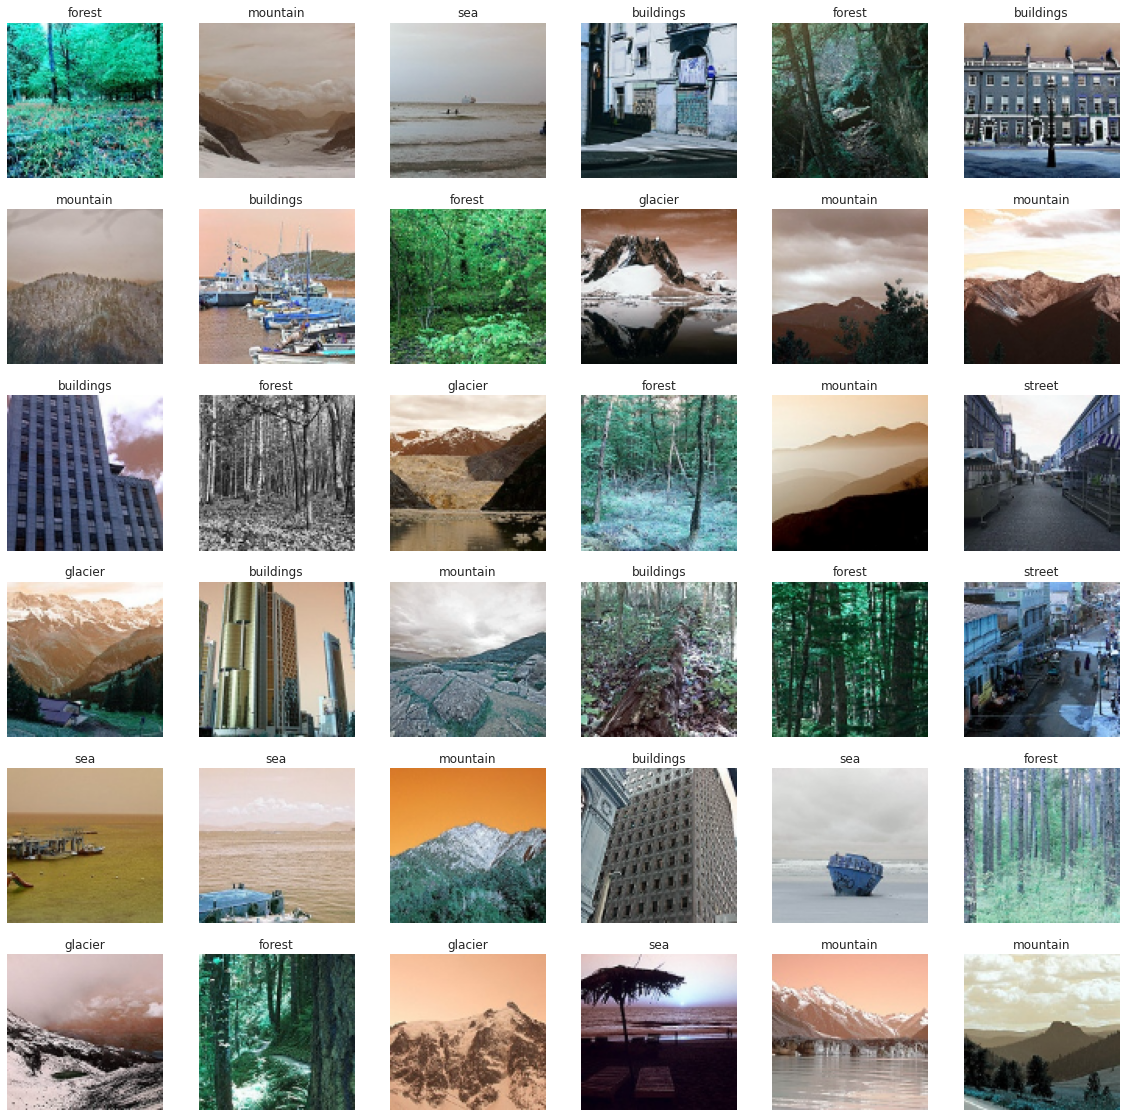

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))